In [1]:
import cv2
import random
import time
import numpy as np
from scipy import misc

from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import pickle

In [3]:
with open('training_data.pkl','rb') as fhdl:
    all_data = pickle.load(fhdl)

C:\Users\Reimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Reimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


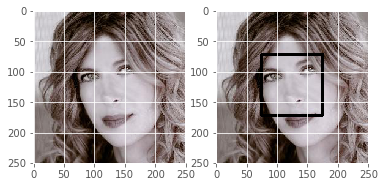

In [5]:
randimg = random.choice(list(all_data.keys()))
plt.subplot(1,2,1)
plt.imshow(misc.imread(randimg))
plt.subplot(1,2,2)
plt.imshow(
    cv2.rectangle(misc.imread(randimg),all_data[randimg][:2],all_data[randimg][2:],(0,0,0),4)
)

In [6]:
(250 - 100) / 15

10.0

In [7]:
def get_iou(cord1, cord2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    bb1 = {}
    bb1['x1'] = cord1[0]
    bb1['y1'] = cord1[1]
    bb1['x2'] = cord1[2]
    bb1['y2'] = cord1[3]
    
    bb2 = {}
    bb2['x1'] = cord2[0]
    bb2['y1'] = cord2[1]
    bb2['x2'] = cord2[2]
    bb2['y2'] = cord2[3]
    
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [8]:
IM_train,y_train = [],[]
for one_file in list(all_data.keys())[:-200]:
    #plt.subplot(1,2,1)
    #plt.imshow(misc.imread(one_file))
    image_arr = misc.imread(one_file)
    target = all_data[one_file]
    
    #image = misc.imread(one_file)
    #for i in range(0,150,15):
    #    for j in range(0,150,15):
    #        cord = (i,j,i + 100,j + 100)
    #        if get_iou(target,cord) < 0.7:
    #            cv2.rectangle(image,(i,j),(i + 100,j + 100),(255,255,255),3)
    #            
    #for i in range(0,150,15):
    #    for j in range(0,150,15):
    #        cord = (i,j,i + 100,j + 100)
    #        if get_iou(target,cord) > 0.7:
    #            cv2.rectangle(image,(i,j),(i + 100,j + 100),(0,0,0),3)
#
    #plt.subplot(1,2,2)
    #plt.imshow(image)
                #print(cord,get_iou(target,cord))
    for i in range(0,150,15):
        for j in range(0,150,15):
            cord = (i,j,i + 100,j + 100)
            if get_iou(target,cord) < 0.3:
                y_train.append(0)
                IM_train.append(image_arr[i:i+100,j:j+100])
            elif get_iou(target,cord) > 0.7:
                y_train.append(1)
                IM_train.append(image_arr[i:i+100,j:j+100])

C:\Users\Reimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [9]:
from collections import Counter

In [10]:
Counter(y_train)

Counter({0: 55789, 1: 2757})

In [11]:
55755 / 2757

20.223068552774755

In [12]:
IM_test = []
for one_url in list(all_data.keys())[-200:]:
    image_arr = misc.imread(one_url)
    IM_test.append(image_arr)

C:\Users\Reimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
import pickle
with open('./xy.pkl','wb') as whdl:
    pickle.dump((IM_train,y_train,IM_test),whdl)